In [28]:
import os
import io
import sys
import importlib
import pandas as pd
from lxml import etree
import requests
import json
from IPython.display import Image
import sqlalchemy as sa

htmlparser =  etree.HTMLParser()

globalData = "data"


import util
importlib.reload(util)

<module 'util' from '/Users/zacharyriethof/Desktop/Final Project DS/util.py'>

In [29]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [30]:
def getsqlite_creds(dirname=".",filename="creds.json",source="sqlite"):
    """ Using directory and filename parameters, open a credentials file
        and obtain the two parts needed for a connection string to
        a local provider using the "sqlite" dictionary within
        an outer dictionary.  
        
        Return a scheme and a dbfile
    """
    assert os.path.isfile(os.path.join(dirname, filename))
    with open(os.path.join(dirname, filename)) as f:
        D = json.load(f)
    sqlite = D[source]
    return sqlite["scheme"], sqlite["dbdir"], sqlite["database"]

In [31]:
def buildConnectionString(source="sqlite_book"):
    scheme, dbdir, database = getsqlite_creds(source=source)
    template = '{}:///{}/{}.db'
    return template.format(scheme, dbdir, database)

In [32]:
fstring = buildConnectionString("sqlite_finalproject")
print("Connection string:",fstring)

engine = sa.create_engine(fstring)
connection = engine.connect()

Connection string: sqlite:///./finalproject.db


- Establish connection from client to server 

In [33]:
%sql $fstring

# Tables that I am using in SQL
- pitcharsenal
    - This dataset contains the types of pitches each pitcher used throughout the 2021 season and the outcomes and stats for each pitch. The column names in this dataset are last_name, first_name, player_id, team_name_alt, pitch_type, pitch_name, run_value_per_100, run_value, pitches, pitch_usage, pa, ba, slg, woba, whiff_percent, k_percent, put_away, est_ba, est_slg, est_woba, hard_hit_percent. Data format of this dataset is a csv file and the number of rows in this dataset in 2377.
    - Query used for this dataset
    - query2 = """
       - CREATE TABLE IF NOT EXISTS pitcharsenal (
       - last_name VARCHAR(20) NOT NULL,
       - first_name VARCHAR(20) NOT NULL,
       - player_id INT NOT NULL,
       - team_name_alt VARCHAR(3) NOT NULL, 
       - pitch_type VARCHAR(10) NOT NULL, 
       - pitch_name VARCHAR(15) NOT NULL,
       - run_value_per_100 FLOAT NOT NULL, 
       - run_value INT NOT NULL,  
       - pitches INT NOT NULL,
       - pitch_usage FLOAT NOT NULL,
       - pa INT NOT NULL, 
       - ba FLOAT NOT NULL, 
       - slg FLOAT NOT NULL,
       - woba FLOAT NOT NULL, 
       - whiff_percent FLOAT NOT NULL,  
       - k_percent FLOAT NOT NULL,  
       - put_away FLOAT NOT NULL,  
       - est_ba FLOAT NOT NULL,
       - est_slg FLOAT NOT NULL,
       - est_woba FLOAT NOT NULL,
       - hard_hit_percent VARCHAR(10) NOT NULL,
       - PRIMARY KEY (pitch_name, player_id))    
"""
- teamstats
    - I will be using the Team Standard Pitching table available on the website baseball reference which contains the overall pitching stats of every team in the MLB for the 2021 season. The column names in this dataset are Tm, #P, PAge, RA/G, W, L, W-L%, ERA, G, GS, GF, CG, tSHo, SV, IP, H, R, ER, HR, BB, IBB, SO, HBP, BK, WP, BF, ERA+, FIP, WHIP, H9, HR9, BB9, SO9, SO/W, LOB. The number of rows in this dataset is 30.
    - Query used for this dataset
    - query3 = """
        - CREATE TABLE IF NOT EXISTS teamstats (
        - Tm VARCHAR(40) NOT NULL,
        - NP INT NOT NULL,
        - PAge FLOAT NOT NULL,
        - RAPG FLOAT NOT NULL,
        - W INT NOT NULL,
        - L INT NOT NULL,
        - WLP FLOAT NOT NULL,
        - ERA FLOAT NOT NULL,
        - G INT NOT NULL,
        - GS INT NOT NULL,
        - GF INT NOT NULL,
        - CG INT NOT NULL,
        - tSho INT NOT NULL,
        - cSho INT NOT NULL,
        - SV INT NOT NULL,
        - IP FLOAT NOT NULL,
        - H INT NOT NULL,
        - R INT NOT NULL,
        - ER INT NOT NULL,
        - HR INT NOT NULL,
        - BB INT NOT NULL,
        - IBB INT NOT NULL,
        - SO INT NOT NULL,
        - HBP INT NOT NULL,
        - BK INT NOT NULL,
        - WP INT NOT NULL,
        - BF INT NOT NULL,
        - ERAP INT NOT NULL,
        - FIP FLOAT NOT NULL,
        - WHIP FLOAT NOT NULL,
        - H9 FLOAT NOT NULL,
        - HR9 FLOAT NOT NULL,
        - BB9 FLOAT NOT NULL,
        - SO9 FLOAT NOT NULL,
        - SOWR FLOAT NOT NULL,
        - LOB INT NOT NULL,
        - PRIMARY KEY (Tm)) 
"""

# Used a query to access the teamstats table on SQL and assign it to a dataframe called teamdf

In [34]:
query = """
SELECT *
FROM teamstats
"""
resultset = %sql $query
teamdf = resultset.DataFrame()

 * sqlite:///./finalproject.db
Done.


In [35]:
teamdf

,Tm,NP,PAge,RAPG,W,L,WLP,ERA,G,GS,...,BF,ERAP,FIP,WHIP,H9,HR9,BB9,SO9,SOWR,LOB
0,Arizona Diamondbacks,41,28.5,5.51,52,110,0.321,5.11,162,162,...,6270,83,4.88,1.436,9.4,1.5,3.5,7.9,2.23,1146
1,Atlanta Braves,30,29.5,4.07,88,73,0.547,3.88,161,161,...,5944,112,4.09,1.243,7.9,1.2,3.3,9.0,2.75,1074
2,Baltimore Orioles,42,28.1,5.90,52,110,0.321,5.84,162,162,...,6252,77,5.15,1.484,9.7,1.7,3.6,7.9,2.19,1103
3,Boston Red Sox,37,29.7,4.62,92,70,0.568,4.26,162,162,...,6147,110,3.95,1.378,8.9,1.1,3.5,9.7,2.80,1163
4,Chicago Cubs,40,29.4,5.18,71,91,0.438,4.87,162,162,...,6202,87,4.88,1.403,8.8,1.5,3.8,8.7,2.28,1143
5,Chicago White Sox,27,28.3,3.93,93,69,0.574,3.73,162,162,...,5861,118,3.74,1.204,7.7,1.2,3.1,10.2,3.27,1029
6,Cincinnati Reds,36,28.9,4.69,83,79,0.512,4.40,162,162,...,6199,107,4.34,1.357,8.3,1.3,3.9,9.6,2.47,1161
7,Cleveland Indians,25,26.3,4.49,80,82,0.494,4.34,162,162,...,5968,99,4.43,1.281,8.2,1.4,3.3,8.9,2.66,1035
8,Colorado Rockies,26,28.3,4.94,74,87,0.460,4.82,161,161,...,6044,100,4.47,1.386,9.0,1.3,3.5,8.2,2.35,1081
9,Detroit Tigers,29,27.3,4.67,77,85,0.475,4.32,162,162,...,6164,99,4.60,1.367,8.7,1.3,3.6,8.0,2.20,1174


# Used a query to access the pitcharsenal table on SQL and assign it to a dataframe called pitchdf

In [36]:
query = """
SELECT *
FROM pitcharsenal
"""
resultset = %sql $query
pitchdf = resultset.DataFrame()


 * sqlite:///./finalproject.db
Done.


In [37]:
pitchdf

,last_name,first_name,player_id,team_name_alt,pitch_type,pitch_name,run_value_per_100,run_value,pitches,pitch_usage,...,ba,slg,woba,whiff_percent,k_percent,put_away,est_ba,est_slg,est_woba,hard_hit_percent
0,Burnes,Corbin,669203,MIL,FC,Cutter,-1.2,-21,1815,55.4,...,0.213,0.335,0.292,27.8,24.6,24.1,0.246,0.376,0.312,38.4
1,Rodón,Carlos,607074,SF,FF,4-Seamer,-1.2,-22,1826,61.2,...,0.213,0.358,0.290,27.9,30.5,24.1,0.206,0.347,0.278,44.8
2,Gilbert,Logan,669302,SEA,FF,4-Seamer,-0.7,-12,1626,53.9,...,0.259,0.439,0.337,23.7,22.5,20.5,0.262,0.444,0.339,50.5
3,McKenzie,Triston,663474,CLE,FF,4-Seamer,-1.1,-17,1570,55.9,...,0.203,0.358,0.290,19.6,18.2,17.2,0.241,0.451,0.337,46.9
4,Cole,Gerrit,543037,NYY,FF,4-Seamer,-0.5,-8,1698,51.9,...,0.221,0.420,0.313,28.9,33.8,24.8,0.216,0.398,0.300,47.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,Yajure,Miguel,664337,PIT,FC,Cutter,11.9,4,36,7.6,...,0.600,1.000,0.775,28.6,20.0,33.3,0.352,0.477,0.356,50
2372,Muller,Kyle,666205,ATL,CUKC,Curveball,2.1,1,46,19.7,...,0.200,0.300,0.285,38.9,40.0,14.8,0.288,0.409,0.371,33.3
2373,Contreras,Roansy,672710,PIT,CH,Changeup,5.5,3,46,2.9,...,0.333,0.667,0.540,0.0,0.0,0.0,0.301,0.406,0.345,22.2
2374,Naile,James,664942,STL,CUKC,Curveball,-2.9,-1,32,25.4,...,0.200,0.200,0.180,25.0,20.0,11.8,0.288,0.339,0.280,50


# Solving my Central Question 

- What pitch did professional baseball players use the most during the 2021 season and how effective was that kind of pitch on the teams and players that used it the most and least throughout the season.  

# Finding the most popular pitch thrown in the 2021 season

- Building a query to find the sum of the pitches column for every single pitch name. 

In [38]:
query = """
SELECT sum(pitches) AS total, pitch_name
FROM pitcharsenal
GROUP BY pitch_name
ORDER BY total DESC 
"""
resultset = %sql $query
maxpitchdf = resultset.DataFrame()

 * sqlite:///./finalproject.db
Done.


- Gets a table that maps the highest total first and the lowest total last

- Finds that the 4-Seamer was the most popular pitch in the 2021 season as it was thrown 230178 times 

In [39]:
maxpitchdf

,total,pitch_name
0,230178,4-Seamer
1,144048,Slider
2,109842,Sinker
3,77083,Changeup
4,69392,Curveball
5,49692,Cutter
6,10099,Splitter
7,771,N/A


- Building a bar graph to show a visable representation of all the kinds of pitches thrown in the 2021 season

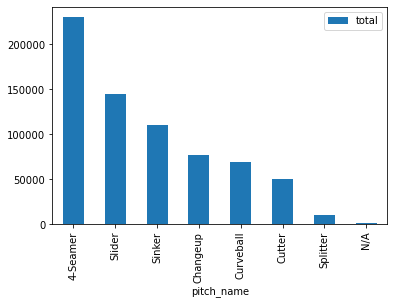

In [40]:
pitchgraph = maxpitchdf.plot.bar(x = "pitch_name", y = "total") # Makes a bar graph which has pitch_name as the x variable and total as the y variable

- From the information I have found I can confidently say that the most popularity pitch thrown in the 2021 season was a 4-Seamer which was used 230178 times throughout the 2021 season. 

# What MLB team used the 4-Seamer the most during the 2021 season 

- Building a query to find the avg usage of the 4-Seamer for each team in the MLB

In [41]:
query = """
SELECT team_name_alt, pitch_name, avg(pitch_usage) AS pitchpercent 
FROM pitcharsenal
WHERE (pitch_name == "4-Seamer")
GROUP BY team_name_alt
ORDER BY pitchpercent DESC
"""
resultset = %sql $query
teampitchdf = resultset.DataFrame()

 * sqlite:///./finalproject.db
Done.


In [42]:
teampitchdf

,team_name_alt,pitch_name,pitchpercent
0,WSH,4-Seamer,48.239130
1,HOU,4-Seamer,46.838889
2,ATL,4-Seamer,46.418750
3,ARI,4-Seamer,46.119048
4,CWS,4-Seamer,45.338889
5,CLE,4-Seamer,44.573684
6,BAL,4-Seamer,44.180769
7,SF,4-Seamer,43.514286
8,KC,4-Seamer,43.290476
9,LAD,4-Seamer,43.113636


# Results
- Teams that use the 4-Seamer the most
    - 1. WSH(Washington Nationals) with 48.23%
    - 2. HOU(Houston Astros) with 46.84%
    - 3. ATL(Atlanta Braves) with 46.42%
    - 4. ARI(Arizona Diamondbacks) with 46.12%
    - 5. CWS(Chicago White Soxs) with 45.34%
- Teams that use the 4-Seamer the least
    - 1. PIT(Pittsburgh Pirates) with 31.31%
    - 2. MIA(Miami Marlins) with 32.67%
    - 3. NYY(New York Yankees) with 34.61%
    - 4. TB(Tampa Bay Rays) with 35.85%
    - 5. LAA(Los Angeles Angels) with 35.91%

# What MLB pitchers used the 4-Seamer the most during the 2021 season 

- Building a query to find the avg usage of the 4-Seamer for each pitcher in the MLB

In [43]:
query = """
SELECT first_name, last_name, pitch_usage, player_id
FROM pitcharsenal
WHERE (pitch_name == "4-Seamer")
GROUP BY player_id
ORDER BY pitch_usage DESC
"""
resultset = %sql $query
playerdf = resultset.DataFrame()

 * sqlite:///./finalproject.db
Done.


In [44]:
playerdf

,first_name,last_name,pitch_usage,player_id
0,Enoli,Paredes,86.0,660600
1,José,Quijada,84.9,650671
2,Jake,McGee,82.8,459429
3,Ian,Kennedy,81.4,453178
4,Colin,Poche,77.5,621363
...,...,...,...,...
589,Aaron,Ashby,3.3,676879
590,Logan,Webb,3.2,657277
591,Jimmy,Herget,2.9,623474
592,Cal,Quantrill,2.7,615698


# Results 
- Players that use the 4-Seamer the most
    - 1. Enoli Paredes with 86%
    - 2. José Quijada with 84.9%
    - 3. Jake McGee with 82.8%
    - 4. Ian Kennedy with 81.4%
    - 5. Colin Poche with 77.5%
- Players that use the 4-Seamer the least
    - 1. Corey Kluber with 1.5%
    - 2. Cal Quantrill with 2.7%
    - 3. Jimmy Herget with 2.9%
    - 4. Logan Webb with 3.2%
    - 5. Aaron Ashby with 3.3%

# Was the 4-Seamer effective for the top 5 teams who used it the most?  

- Making a query to have just the average of the most importent pitching data such as ERA, H9, HR9, SO9, BB9
    - ERA - Earned run percentage
    - H9 - Hits per 9 innings 
    - HR9 - Home runs per 9 innings 
    - BB9 - Bases on balls/walks per 9 innings 
    - SO9 - Strikeouts per 9 innings 

In [45]:
query = """
SELECT avg(ERA) AS ERA, avg(H9) AS H9, avg(HR9) AS HR9, avg(SO9) AS SO9, avg(BB9) AS BB9       
FROM teamstats 
 
"""
resultset = %sql $query
averagedf = resultset.DataFrame()

 * sqlite:///./finalproject.db
Done.


- Adding to column that tells us these stats are the MLB league averages

In [46]:
team = ["League Avg"]

averagedf["Tm"] = team

In [47]:
averagedf

,ERA,H9,HR9,SO9,BB9,Tm
0,4.263333,8.343333,1.263333,8.903333,3.336667,League Avg


- Making a query that gets the ERA, H9, HR9, SO9, and BB9 for the five top teams that used the 4-Seamer

In [48]:
query = """
SELECT Tm,ERA, H9, HR9, SO9, BB9  
FROM teamstats
WHERE (Tm == "Washington Nationals") OR (Tm == "Houston Astros") OR (Tm == "Atlanta Braves") OR (Tm == "Arizona Diamondbacks") OR (Tm == "Chicago White Sox")

"""
resultset = %sql $query
moredf = resultset.DataFrame()

 * sqlite:///./finalproject.db
Done.


In [49]:
moredf

,Tm,ERA,H9,HR9,SO9,BB9
0,Arizona Diamondbacks,5.11,9.4,1.5,7.9,3.5
1,Atlanta Braves,3.88,7.9,1.2,9.0,3.3
2,Chicago White Sox,3.73,7.7,1.2,10.2,3.1
3,Houston Astros,3.78,7.7,1.2,9.1,3.4
4,Washington Nationals,4.80,8.8,1.6,8.7,3.5


- Combined my moredf and the averagedf into one dataframe called combinedf

In [50]:
combinedf = pd.concat([moredf, averagedf], axis = 0) # Combining moredf and averagedf into one dataframe combinedf

combinedf = combinedf.set_index("Tm") # Setting Tm as a index for the combinedf dataframe

In [51]:
combinedf

,ERA,H9,HR9,SO9,BB9
Tm,,,,,
Arizona Diamondbacks,5.110000,9.400000,1.500000,7.900000,3.500000
Atlanta Braves,3.880000,7.900000,1.200000,9.000000,3.300000
Chicago White Sox,3.730000,7.700000,1.200000,10.200000,3.100000
Houston Astros,3.780000,7.700000,1.200000,9.100000,3.400000
Washington Nationals,4.800000,8.800000,1.600000,8.700000,3.500000
League Avg,4.263333,8.343333,1.263333,8.903333,3.336667


- Transpose the combinedf dataset to which its columns with the Tm group names or names of the teams 

In [26]:
newData = combinedf.transpose()

- Plots the newData into a bar graph
    - In Baseball(lower numbers == Better)

<AxesSubplot:>

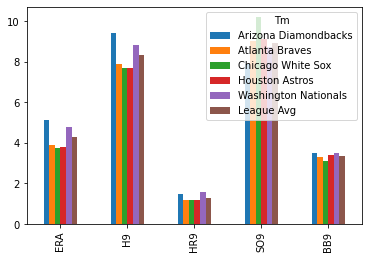

In [52]:
newData.plot(kind = "bar")

# Results from graph 
- Arizona Diamondbacks
    - Stats above league average: 4/5 
    - Stats below league average: 1/5
    - Was the use of the 4-Seamer effective for team? From what I have seen from the graph I do not think the 4-Seamer for the Arizona Diamondbacks has been effective as they have 4 of there 5 stat categorys that are above league average resulting in only 52 wins in the 2021 season.    
- Atlanta Braves
    - Stats above league average: 2/5 
    - Stats below league average: 3/5 
    - Was the use of the 4-Seamer effective for team? The 4-Seamer has been mediate effective for the Atlanta Braves as they have 3 of there 5 stat categorys that are under the league average resulting in positive record with 88 wins.   
- Chicago White Sox
    - Stats above league average: 1/5 
    - Stats below league average: 4/5
    - Was the use of the 4-Seamer effective for team? The 4-Seamer has been very effective for the Chicago White Soxs as they have 4 of there 5 stat categorys that are under the league average resulting in a very good season with 93 wins.  
- Houston Astros 
    - Stats above league average: 2/5 
    - Stats below league average: 3/5
    - Was the use of the 4-Seamer effective for team? The 4-Seamer has been mediate effective for the Houston Astros as they had 3 of there 5 stat categorys go under league average. Also the Houston Astros use of the 4-Seamer was mediate effective they still were able to win 95 games on the sseason. 
- Washington Nationals 
    - Stats above league average: 1/5 
    - Stats below league average: 4/5
    - Was the use of the 4-Seamer effective for team? The 4-Seamer has been very effective for the Washington Nationals as they had 4 of there 5 stat categorys go under league average. Although the 4-Seamer was a very effective pitch for the Washington National they still finished the 2021 season way under .500 as they only got 65 wins.   
    
   

# Was the 4-Seamer effective for the top 5 teams who used it the least?  

- Making a query to have just the average of the most importent pitching data such as ERA, H9, HR9, SO9, BB9
    - ERA - Earned run percentage
    - H9 - Hits per 9 innings 
    - HR9 - Home runs per 9 innings 
    - BB9 - Bases on balls/walks per 9 innings 
    - SO9 - Strikeouts per 9 innings 

In [348]:
query = """
SELECT Tm,ERA, H9, HR9, SO9, BB9  
FROM teamstats
WHERE (Tm == "Pittsburgh Pirates") OR (Tm == "Miami Marlins") OR (Tm == "New York Yankees") OR (Tm == "Tampa Bay Rays") OR (Tm == "Los Angeles Angels")

"""
resultset = %sql $query
lessdf = resultset.DataFrame()

 * sqlite:///./finalproject.db
Done.


In [349]:
lessdf

,Tm,ERA,H9,HR9,SO9,BB9
0,Los Angeles Angels,4.69,8.7,1.2,9.2,3.7
1,Miami Marlins,3.96,8.2,1.0,8.8,3.4
2,New York Yankees,3.74,7.8,1.2,9.8,3.1
3,Pittsburgh Pirates,5.08,9.0,1.4,8.5,3.9
4,Tampa Bay Rays,3.67,7.8,1.1,9.1,2.7


- Combined my lessdf and the averagedf into one dataframe called combinedf

In [350]:
combinedf2 = pd.concat([lessdf, averagedf], axis = 0) # Combining lessdf and averagedf into one dataframe combinedf

combinedf2 = combinedf2.set_index("Tm") # Setting Tm as a index for the combinedf dataframe

In [351]:
combinedf2

,ERA,H9,HR9,SO9,BB9
Tm,,,,,
Los Angeles Angels,4.690000,8.700000,1.200000,9.200000,3.700000
Miami Marlins,3.960000,8.200000,1.000000,8.800000,3.400000
New York Yankees,3.740000,7.800000,1.200000,9.800000,3.100000
Pittsburgh Pirates,5.080000,9.000000,1.400000,8.500000,3.900000
Tampa Bay Rays,3.670000,7.800000,1.100000,9.100000,2.700000
League Avg,4.263333,8.343333,1.263333,8.903333,3.336667


- Transpose the combinedf2 dataset to which its columns with the Tm group names or names of the teams 

In [352]:
newData2 = combinedf2.transpose()

- Plots the newData2 dataframe into a bar graph
    - In Baseball(lower numbers == Better)

<AxesSubplot:>

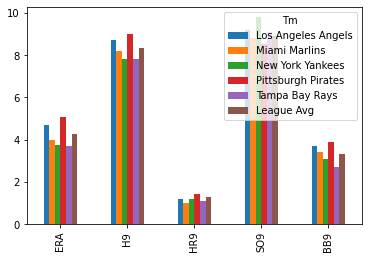

In [353]:
newData2.plot(kind = "bar")

# Results from graph
- Los Angeles Angels
    - Stats above league average: 4/5
    - Stats below league average: 1/5
    - Was the use of the 4-Seamer effective for team? When the Los Angeles Angels used the 4-Seamer they were not very effective as 4 of there 5 stat categorys was over the league average. The Los Angeles Angels were able to have a moderate record with 77 wins in the 2021 season why not using the 4-Seamer as a effective pitch. 
- Miami Marlins 
    - Stats above league average: 1/5
    - Stats below league average: 4/5
    - Was the use of the 4-Seamer effective for team? When the Miami Marlins used the 4-Seamer they were very effective with the pitch as they had 4 of there 5 stat categorys under the league average. This successful usage of the 4-Seamer did not help there record out tho with the Marlins only getting 65 wins in the 2021 season.  
- New York Yankees
    - Stats above league average: 1/5 
    - Stats below league average: 4/5
    - Was the use of the 4-Seamer effective for team? When the New York Yankees used the 4-Seamer they were very effective with the pitch as thye had 4 of there 5 stat categorys under the league average. The New York Yankees were able to use the 4-Seamer in a successful way helping them pick up 92 wins of the 2021 season. 
- Pittsburgh Pirates
    - Stats above league average: 4/5
    - Stats below league average: 1/5
    - Was the use of the 4-Seamer effective for team? Pittsburgh Pirates argueable the worst team in baseball used the 4-Seamer in a not effective way as 4 of there 5 stat categorys are over the league average. The unsuccesful use of the 4-Seamer was a comtribution to the league worsted 61 wins the Pittsburgh Pirates had on the 2021 season.  
- Tampa Bay Rays
    - Stats above league average: 5/5
    - Stats below league average: 0/5
    - Was the use of the 4-Seamer effective for team? The Tampa Bay Rays used the 4-Seamer in a excellent and effecive way as all 5 stat categorys were under the league average. These was a contribution to there great year they had in the 2021 season picking up 100 wins. 

# Was the 4-Seamer effective for the top 5 MLB pitchers who use the 4-Seamer the most

- Making a query to find the league average of the most importent stats in the pitcharsenal ba, slg, and woba. 
    - ba - Batting average against pitch
    - slg - Slugging percent against pitch
    - woba - Weighted on base percentise against pitch

In [354]:
query = """
SELECT avg(ba) AS ba, avg(slg) AS slg, avg(woba) AS woba           
FROM pitcharsenal 
WHERE (pitch_name == "4-Seamer")
 
"""
resultset = %sql $query
averagedf2 = resultset.DataFrame()

 * sqlite:///./finalproject.db
Done.


In [355]:
averagedf2

,ba,slg,woba
0,0.261488,0.448343,0.359402


- Adding to column that tells us these stats are the MLB league averages

In [356]:
name = ["League Average"]

averagedf2["name"] = name


In [357]:
averagedf2

,ba,slg,woba,name
0,0.261488,0.448343,0.359402,League Average


- Making a query to grab the top 5 players that used the 4-Seamer the most

In [358]:
query = """
SELECT (first_name || ' ' || last_name) AS name, ba, slg, woba 
FROM pitcharsenal 
WHERE (pitch_name == "4-Seamer")
GROUP BY player_id
HAVING (player_id == 660600) OR (player_id == 650671) OR (player_id == 459429) OR (player_id == 453178) OR (player_id == 621363 )  
"""
resultset = %sql $query
moredf2 = resultset.DataFrame()

 * sqlite:///./finalproject.db
Done.


In [359]:
moredf2

,name,ba,slg,woba
0,Ian Kennedy,0.238,0.451,0.337
1,Jake McGee,0.288,0.480,0.362
2,Colin Poche,0.218,0.406,0.310
3,José Quijada,0.179,0.366,0.290
4,Enoli Paredes,0.222,0.222,0.325


- Combined my moredf2 and the averagedf2 into one dataframe called combinedf3

In [360]:
combinedf3 = pd.concat([moredf2, averagedf2], axis = 0)

combinedf3 = combinedf3.set_index(["name"])

In [361]:
combinedf3

,ba,slg,woba
name,,,
Ian Kennedy,0.238000,0.451000,0.337000
Jake McGee,0.288000,0.480000,0.362000
Colin Poche,0.218000,0.406000,0.310000
José Quijada,0.179000,0.366000,0.290000
Enoli Paredes,0.222000,0.222000,0.325000
League Average,0.261488,0.448343,0.359402


- Transpose the combinedf3 dataset to which its columns with the group names or names of the players

In [362]:
newData3 = combinedf3.transpose()

- Plots the newData3 into a bar graph
    - In Baseball(lower numbers == Better)

<AxesSubplot:>

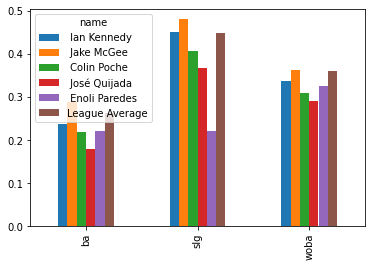

In [363]:
newData3.plot(kind = "bar")

# Results from graph 
- Ian Kennedy
    - Stats above league average: 1/3
    - Stats below league average: 2/3 
    - Was the use of the 4-Seamer effective for the player? The 4-Seamer pitch seemed to be moderately effective for Ian Kennedy as he had ba and woba below league average and slg barely over the league average as he uses the 4-Seamer as 81.4% of his pitches   
- Jake McGee
    - Stats above league average: 3/3
    - Stats below league average: 0/3 
    - Was the use of the 4-Seamer effective for the player? The 4-Seamer pitch seemed to be very uneffective for Jake McGee as all the categorys ba, slg, and woba were above league average. This is very surprising for a pitch that used the 4-Seamer 82.8% of his pitches.  
- Colin Poche
    - Stats above league average: 0/3
    - Stats below league average: 3/3
    - Was the use of the 4-Seamer effective for the player? The 4-Seamer pitch seemed to very effective for Colin Poche who had all his categorys ba, slg, woba below the league average. Becuase Colin Poche has had much success with the 4-Seamer it is no surprise he uses the 4-Seamer as 77.5% of his pitches.  
- José Quijada
    - Stats above league average: 0/3
    - Stats below league average: 3/3
    - Was the use of the 4-Seamer effective for the player? The 4-Seamer pitch has seemed to be very effective for José Quijada who has all his categorys ba, slg, woba under the league average. The success from the 4-Seamer pitch has allowed José Quijada to use it among 84.9% of his pitches.  
- Enoli Paredes
    - Stats above league average: 0/3
    - Stats below league average: 3/3
    - Was the use of the 4-Seamer effective for the player? The 4-Seamer seemed to be very effective for the league leader to pitch usage for the 4-Seamer at 86% of his pitches. All of his categorys ba, slg, woba were below the league average meaning that Enoli Paredes has had success in using the 4-Seamer 

# Was the 4-Seamer effective for the  5 MLB pitchers who use the 4-Seamer the least

- Making a query to find the league average of the most importent stats in the pitcharsenal ba, slg, and woba. 
    - ba - Batting average against pitch
    - slg - Slugging percent against pitch
    - woba - Weighted on base percentise against pitch

- Making a query to grab the top 5 players that used the 4-Seamer the least

In [364]:
query = """
SELECT (first_name || ' ' || last_name) AS name, ba, slg, woba 
FROM pitcharsenal 
WHERE (pitch_name == "4-Seamer")
GROUP BY player_id
HAVING (player_id == 676879) OR (player_id == 657277) OR (player_id == 623474) OR (player_id == 615698) OR (player_id == 446372)  
"""
resultset = %sql $query
lessdf2 = resultset.DataFrame()

 * sqlite:///./finalproject.db
Done.


In [365]:
lessdf2

,name,ba,slg,woba
0,Corey Kluber,0.273,0.545,0.345
1,Cal Quantrill,0.333,0.583,0.453
2,Jimmy Herget,0.200,0.200,0.180
3,Logan Webb,0.167,0.208,0.240
4,Aaron Ashby,0.308,0.538,0.510


- Combined my lessdf2 and the averagedf2 into one dataframe called combinedf4

In [366]:
combinedf4 = pd.concat([lessdf2, averagedf2], axis = 0)

combinedf4 = combinedf4.set_index(["name"])

- Transpose the combinedf4 dataset to which its columns with the group names or names of the players

In [367]:
newData4 = combinedf4.transpose()

- Plots newData4 into a bar graph
    - In Baseball(lower numbers == Better)

<AxesSubplot:>

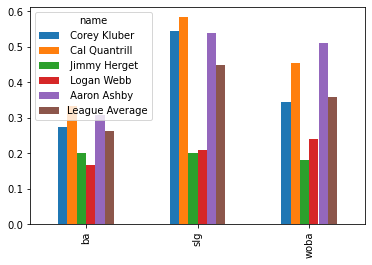

In [368]:
newData4.plot(kind = "bar")

# Results from graph 
- Corey Kluber
    - Stats above league average: 2/3
    - Stats below league average: 1/3 
    - Was the use of the 4-Seamer effective for the player? The 4-Seamer pitch seemed to not be a very effective pitch for Corey Kluber as he had the categorys ba, slg above league average and the category woba which was below league average. As Corey Kluber did not really use the 4-Seamer effectively it is no surprise that he only uses the pitch as the league low 1.5% of his pitches. 
- Cal Quantrill
    - Stats above league average: 3/3
    - Stats below league average: 0/3 
    - Was the use of the 4-Seamer effective for the player? The 4-Seamer pitch was not effective at all for Cal Quantrill as all the categorys ba, slg, woba were above league average. This evidence supports why Cal Quantrill only used the 4-Seamer pitch as 2.7% of his pitches as the 4-Seamer was not effective for him. 
- Jimmy Herget
    - Stats above league average: 0/3
    - Stats below league average: 3/3 
    - Was the use of the 4-Seamer effective for the player? The 4-Seamer pitch was surprisingly very effective for Jimmy Herget as all the categorys ba, slg, woba were under the league average. This is very intersting information as with the success of the 4-Seamer I would think Jimmy Herbet would be using the 4-Seamer more then just 2.9% of his pitches. 
- Logan Webb
    - Stats above league average: 0/3
    - Stats below league average: 3/3 
    - Was the use of the 4-Seamer effective for the player? The 4-Seamer pitch was again surprisingly very effective for Logan webb as he had all the categorys ba, slg, woba under the league average. When Logan webb used the 4-Seamer pitch he was very effective with it as he would only use the 4-Seamer just 3.2% of his pitches. 
- Aaron Ashby
    - Stats above league average: 3/3
    - Stats below league average: 0/3 
    - Was the use of the 4-Seamer effective for the player? The 4-Seamer pitch was not effective at all for Aaron Ashby as he had all the catgeorys ba, slg, woba above the league average. As Aaron Ashby did not have any success with the 4-Seamer pitch which really supported why he only used the pitch 3.3% of his pitches. 

# Conclusion 
 
- Most popular pitch in the 2021 season was the 4-Seamer which was thrown about 230178 times


- From the graphs, I was able to get a small summary of every team or player that was in the top 5 team or players that used the 4-Seamer pitch the most and the least. From what information I got out of the graphs I was able to see some clear patterns in effectiveness but also I had some outliers that stuck out to me that were the opposite of the clear patterns in effectiveness in the graphs.  